# Project 14 - Physicell visualization

Hello, welcome to our visualization tools for Phyiscell simulations.
You will note the that the first line in this file is `%matplotlib notebook`. This is to make sure that our graphs display correctly. If you do not include this line, then the graphs will not update correctly. The visualization code is located in the function `viewSimulation` in the `physicellviewer` package, so lets import it.

In [1]:
%matplotlib notebook

from physicellviewer import viewSimulation

The `viewSimulation` function takes in the path to the folder with a physicell simulation output and will result in an interactive visualization of the simulation.

Here is a discription of the tools this visualization has.

  - The visualization: a visualization of the cells and environment of the simulation at the current frame.
  - Mouse Actions: Allows you to control what the mouse does when clicking and draging on the visulaization. Note: you can select a cell by clicking a cell with `select` selected in the `Mouse Actions`.
  - Frame: traverse the frames of the simulations.
  - Visible: control what is visible on the visualization. Note that you can select multiple using the `command` and `shift` keys while clicking.
  - Attribute Graph: select which attribute is visible on the cell attribute graph (the first graph under the radio buttons)
  - General Graph: A visualization of the amount of cells alive and dead in the simulation over time.

In [2]:
viewer = viewSimulation('./Vascular_Sim', height=800,width=800)

You have to call `.show()` to actually see anything. If the visualization gets truncated, click to the left of the visualization to see the entire visualization.

Canvas(height=800, width=800)

IntSlider(value=0, continuous_update=False, description='Frame:', max=25)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'oxygen'), value=('cell',))

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


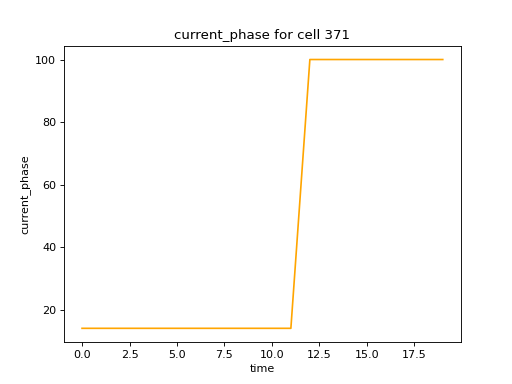

<IPython.core.display.Javascript object>


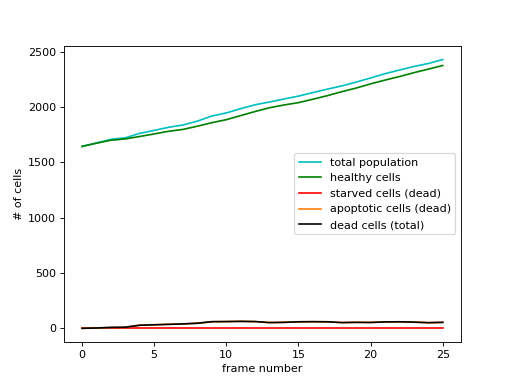

In [3]:
viewer.show()

If you wish to view only specific cells, you can do so by giving a `filterFunction` to the visualization. A filter function returns a numpy array containing the indicies to show. Let's look at only dead cells. Note that the first frame has no dead cells, so you will have to change to a different frame to see anything.

Canvas(height=400, width=500)

IntSlider(value=0, continuous_update=False, description='Frame:', max=9)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'oxygen'), value=('cell',))

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


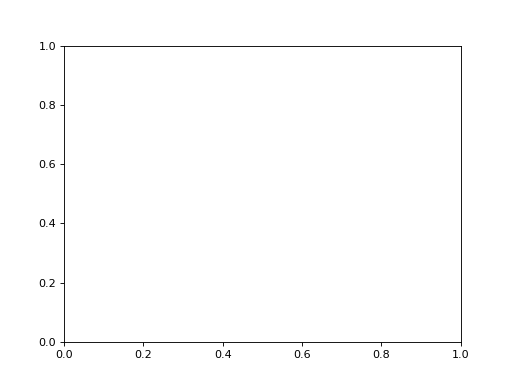

<IPython.core.display.Javascript object>


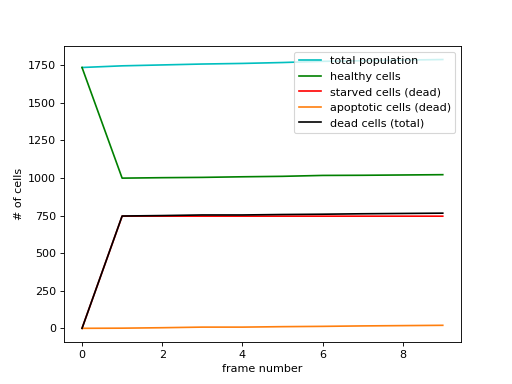

In [4]:
from physicellviewer.filterFunctions import onlyDead

viewSimulation('./sample-output', filterFunction = onlyDead).show()

We need to know what these colors mean, so lets look at the doc string of the colorMap which is used for this visualization.

In [5]:
from physicellviewer.cell2dColorMaps import defaultColorMap

help(defaultColorMap)

Help on function defaultColorMap in module physicellviewer.cell2dColorMaps:

defaultColorMap(cells, variables, selectedCell)
    default 2d cell coloring function. Colors by cycle_model:
    
        live: green
        apoptosis_death: blue
        necrosis_death: red
        autophagy_death: orange
        
        selected_cell: white



You can change the color map used for visualization by adding the named paramter `colorMap` to the `viewSimulation` call. Let's look at what the colors for the environment renderer is. 

In [6]:
from physicellviewer.environment2dRenderers import defaultRender2DEnvironment

help(defaultRender2DEnvironment)

Help on function defaultRender2DEnvironment in module physicellviewer.environment2dRenderers:

defaultRender2DEnvironment(attribute, environment, rRange=(0, 255), gRange=(0, 255), bRange=(0, 255), aRange=(0, 255))
    Default 3d environment renderer. White is the highest value in the frame and black is the lowest value.



Note that whitest `white` is the highest value in the `frame` and not the entire simulation. If you want to change the coloring for the environment, you can pass in the named parameter `environmentRenderer` to the `viewSimulation` call. Now, let's look at a `3d` simulation.

Canvas(height=800, width=800)

IntSlider(value=0, continuous_update=False, description='Frame:', max=5)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'rotate', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'oxygen', 'immunostimulatory factor'), val…

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


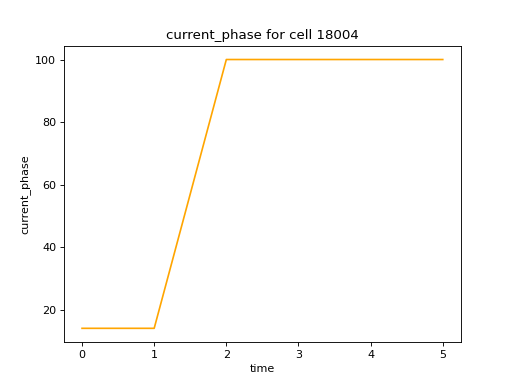

<IPython.core.display.Javascript object>


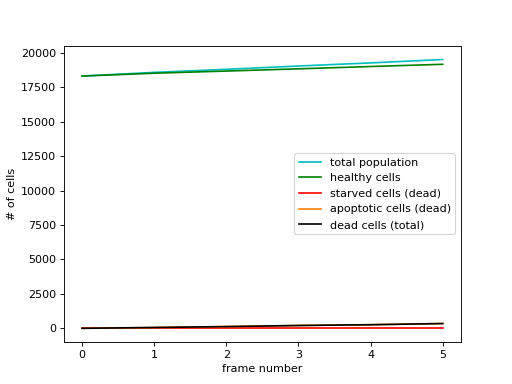

In [7]:
viewSimulation('./sample-output-3d', width=800, height=800).show()

The main difference is that the visualization is now in `3d` and there is a new action available to rotate the camera. The named parameters `width` and `height` controll the dimensions of the visualization. Let's look at the color codes for the cells.

In [8]:
from physicellviewer.cell3dColorMaps import defaultColorMap3d

help(defaultColorMap3d)

Help on function defaultColorMap3d in module physicellviewer.cell3dColorMaps:

defaultColorMap3d(cells, variables, selectedCellId)
    default 3d cell coloring function. Colors by cycle_model:
    
        live: green
        apoptosis_death: blue
        necrosis_death: red
        autophagy_death: orange
        
        selected_cell: white



And for the environment...

In [9]:
from physicellviewer.environment3dRenderers import defaultEnvironment

help(defaultEnvironment)

Help on function defaultEnvironment in module physicellviewer.environment3dRenderers:

defaultEnvironment(environment, attribute)
    Default 3d environment renderer. White is the highest value in the frame and black is the lowest value.



They are exactly the same as the `2d` visualization. Again, you can over ride these in the call to `viewSimulation` if wanted. View the doc strings for the `Interactor2D` and `Interactor3D` to get the signatures for these functions. You can also force a `3d` visualization of a `2d` environment if wanted by supplying the `force3d` named parameter.

Canvas(height=800, width=800)

IntSlider(value=0, continuous_update=False, description='Frame:', max=500)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'rotate', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'oxygen'), value=('cell',))

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


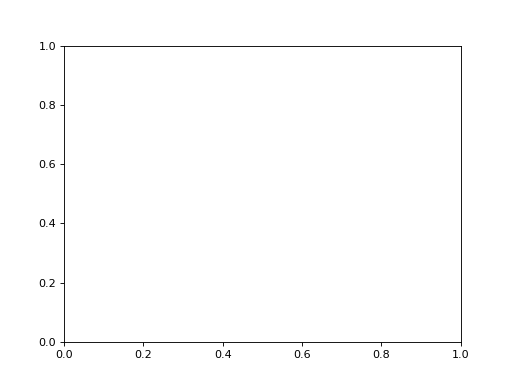

<IPython.core.display.Javascript object>


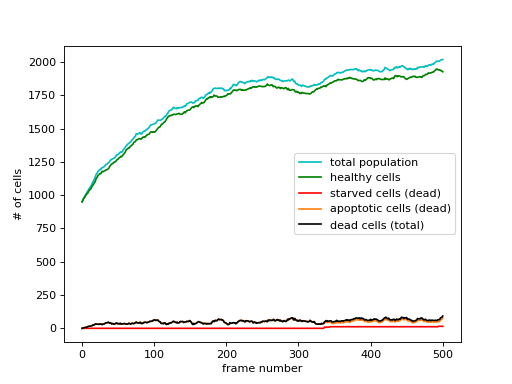

In [10]:
viewSimulation('./Meat_Sim_Fin3', width=800, height=800, force3d = True).show()

Doing this means that the other environment varaibles can not be rendered. You can also visualize `3d` environments as `2d` environments, I have no idea why you would do this, but the functionality is there.

Canvas(height=800, width=800)

IntSlider(value=0, continuous_update=False, description='Frame:', max=5)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'oxygen', 'immunostimulatory factor'), val…

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


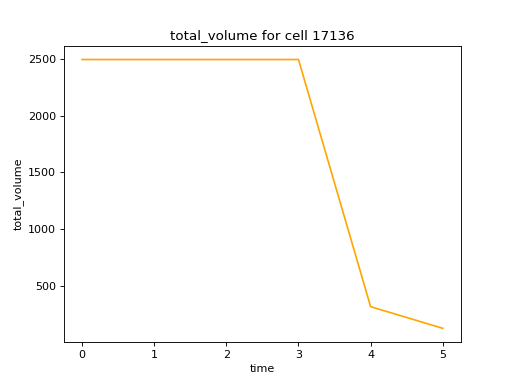

<IPython.core.display.Javascript object>


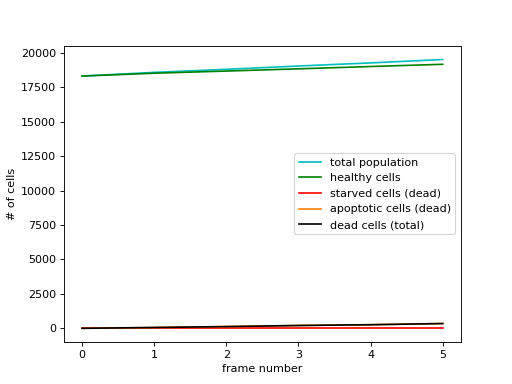

In [11]:
viewSimulation('./sample-output-3d', width=800, height=800, force2d = True).show()

That wraps up our examples, good luck with your visualizations! Here is a more complex simulation just for fun.

Canvas(height=800, width=800)

IntSlider(value=0, continuous_update=False, description='Frame:', max=19)

RadioButtons(description='Mouse Action:', options=('move', 'zoom', 'select'), value='move')

SelectMultiple(description='Visible:', index=(0,), options=('cell', 'director signal', 'cargo signal'), value=…

RadioButtons(description='Attribute Graph:\n', options=('ID', 'position.x', 'position.y', 'position.z', 'total…

Output()

<IPython.core.display.Javascript object>


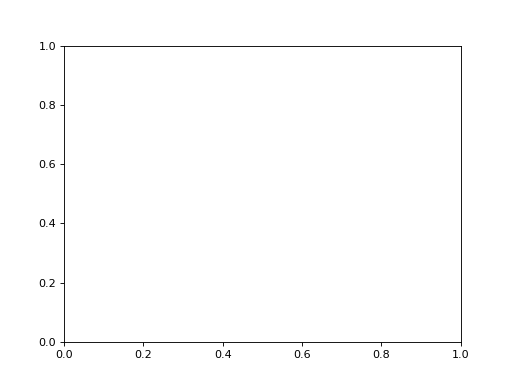

<IPython.core.display.Javascript object>


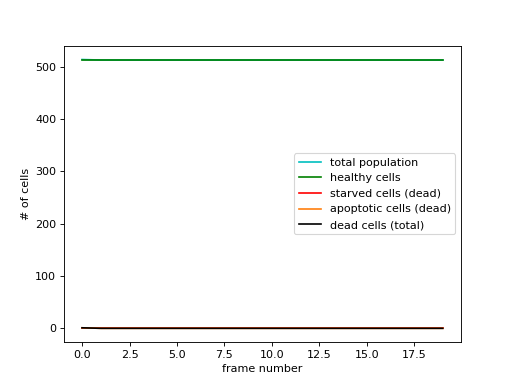

In [12]:
viewSimulation('./Biorobots', width=800, height=800, force2d = True).show()